<a href="https://colab.research.google.com/github/Ziforge/CollabLibrosaParty/blob/main/02-Compute/HelloSPIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello SPIS
This is a Markdown cell. Double-click it to edit it or execute it (Shift + Ctrl) to save it. Markdown can be quite nice for any additional figures or documentation you wish to accompany your code with!

In [2]:
# Install Python packages, the "!" means that this command will be executed as a
# shell command, instead of Python code. YOU CAN SKIP THIS CELL ON COLAB: librosa is installed there by default.
!pip install librosa

In [3]:
# Import python Packages
import numpy as np

In [4]:
# Declare an array and compute the mean
myArray = [1, 2, 3, 4]
myMean = np.mean(myArray)
print(myMean)

2.5


## Common pattern for a bug
Due to the sequential nature of Colab, as you're prototyping and running different cells multiple times, you may accidentally create state overwrites without realizing it! Execute only the following cell multiple times and observe how the assertion fails upon the 2nd execution of the cell!

Think about why this occurs and how you can mitigate it. From a software engineering perspective this code may benefit from restructuring. If that is not possible, then for this particular example you have three options:
- Rerun the cell that declares this array (reset the variable declaration)
- Rerun the notebook from the start (all states will be re-written). (*Runtime -> Run All*)
- Restart your Jupyter kernel. Your session will be completley reset and you are starting from a clean slate. (*Runtime -> Restart Session*)

In [5]:
# Add more data and re-compute the mean
myArray.append(5)
myMean = np.mean(myArray)
print(f"Value of myMean: {myMean}")

assert np.isclose(myMean, 3.0)

Value of myMean: 3.0


# Time-Frequency Analysis with librosa
**Problem**: analyzing a trumpet signal
Suppose that we record a trumpet signal $s_n$ for $n=0,1,2,\ldots,N-1$.
<center>
<img src="https://github.com/SMC-AAU-CPH/med4-ap-jupyter/blob/main/lecture7_Fourer_Transfom/figures/trumpet.jpg?raw=1" alt="Trumpet" width="50%"/>
</center>

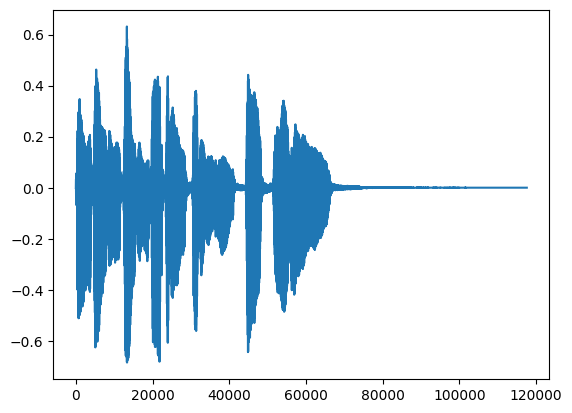

In [6]:
import librosa
filename = librosa.example('trumpet')
s, sr = librosa.load(filename)

import matplotlib.pyplot as plt
plt.plot(s)

In [7]:
#play the audio
import IPython.display as ipd
ipd.Audio(s, rate=sr)

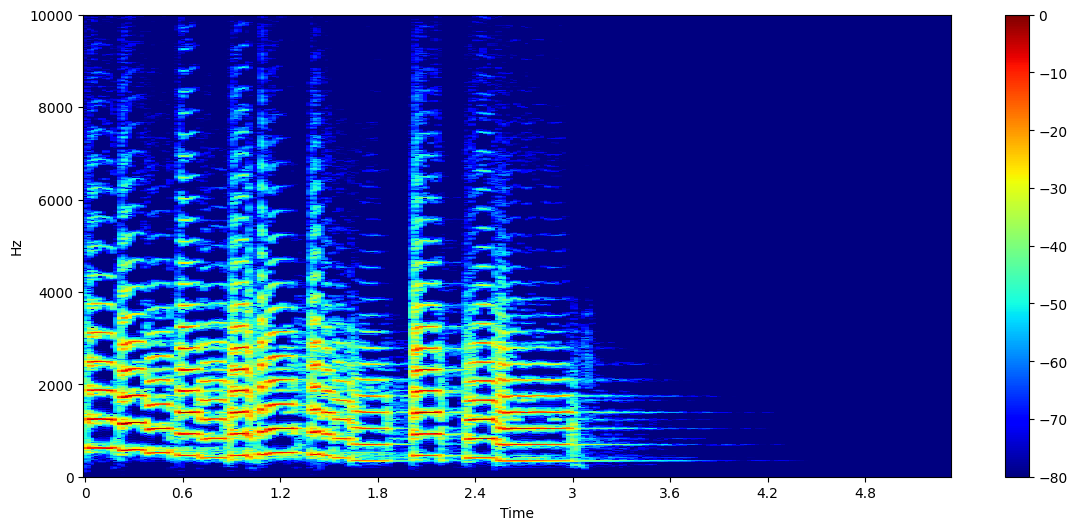

In [8]:
# @title TF Analysis with Librosa
# calculate the STFT of the trumpet signal using librosa

D = librosa.stft(s)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(14,6))
# Change y axis up to 10kHz
plt.ylim(0,10000)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='linear',cmap='jet')
plt.colorbar()